## 均线策略系统

### 库的安装

pyecharts

pip install pyecharts -i http://mirrors.aliyun.com/pypi/simple/ --trusted-host=mirrors.aliyun.com


talib

https://blog.csdn.net/u010671948/article/details/79714647

QuantLib 安装和talib类似

In [1]:
import pandas as pd
import pyecharts
import talib

In [2]:
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode
from pyecharts.charts import Kline, Line, Bar, Grid

In [3]:
from gm.api import *
set_token("eea4b28a3ceb7048603d388bb777ebc67de47385")

In [4]:
history_data = history(symbol='SHSE.000300', frequency='1d', start_time='2020-07-28',  end_time='2021-07-30', fields='open, close, low, high, eob', adjust=ADJUST_PREV, df= True)

In [5]:
history_data

,open,close,low,high,eob
0,4567.6689,4568.2578,4537.6851,4590.2495,2020-07-28 00:00:00+08:00
1,4559.1636,4679.0078,4548.8535,4680.5581,2020-07-29 00:00:00+08:00
2,4689.7632,4656.1504,4649.7676,4704.6304,2020-07-30 00:00:00+08:00
3,4652.1826,4695.0464,4621.9634,4741.8086,2020-07-31 00:00:00+08:00
4,4735.8984,4771.3110,4720.0249,4771.3696,2020-08-03 00:00:00+08:00
...,...,...,...,...,...
242,5067.3071,4925.2988,4859.6030,5067.3071,2021-07-26 00:00:00+08:00
243,4924.2817,4751.3130,4749.0327,4940.8599,2021-07-27 00:00:00+08:00
244,4714.2949,4760.4824,4663.9009,4785.6567,2021-07-28 00:00:00+08:00
245,4845.7603,4850.2744,4800.0127,4857.9707,2021-07-29 00:00:00+08:00


## 基于pyecharts的k线图


更多的例子：

https://gallery.pyecharts.org/#/Candlestick/README

* k线图的基本意义

In [10]:
#

In [11]:
x=[]
y=[]
for i in history_data.iterrows():
    y.append(i[1].tolist()[0:4])
    x.append(i[1].values[4])

In [12]:
k1=Kline()
k1.add_xaxis(x)
k1.add_yaxis("kline", y,itemstyle_opts=opts.ItemStyleOpts(color="pink", color0="black"),)
k1.set_global_opts(
        yaxis_opts=opts.AxisOpts(is_scale=True,splitarea_opts=opts.SplitAreaOpts(areastyle_opts=opts.AreaStyleOpts(opacity=1)
            )),
        xaxis_opts=opts.AxisOpts(is_scale=True),
        title_opts=opts.TitleOpts(title="Kline-基本示例"),datazoom_opts=[opts.DataZoomOpts(type_="inside"),opts.DataZoomOpts(type_="slider")]
    )
k1.render_notebook()

In [30]:
k1=Kline()
k1.add_xaxis(x)
k1.add_yaxis("kline", y,itemstyle_opts=opts.ItemStyleOpts(color="pink", color0="black"),)
k1.set_global_opts(
        yaxis_opts=opts.AxisOpts(is_scale=True,splitarea_opts=opts.SplitAreaOpts(areastyle_opts=opts.AreaStyleOpts(opacity=1)
            )),
        xaxis_opts=opts.AxisOpts(is_scale=True),
        title_opts=opts.TitleOpts(title="Kline-基本示例"),datazoom_opts=[opts.DataZoomOpts(type_="inside"),opts.DataZoomOpts(type_="slider")]
    )

## 股票中的均线

* talib

TA-Lib，全称“Technical Analysis Library”, 即技术分析库，是Python金融量化的高级库，涵盖了150多种股票、期货交易软件中常用的技术分析指标，如MACD、RSI、KDJ、动量指标、布林带等等。TA-Lib可分为10个子板块：Overlap Studies(重叠指标)，Momentum Indicators(动量指标)，Volume Indicators(交易量指标)，Cycle Indicators(周期指标)，Price Transform(价格变换)，Volatility Indicators(波动率指标)，Pattern Recognition(模式识别)，Statistic Functions(统计函数)，Math Transform(数学变换)和Math Operators(数学运算)，

链接：https://www.jianshu.com/p/7ecc7962d638

TA-LIB 200多个技术指标含有及计算式:

https://blog.csdn.net/MARY197011111/article/details/79622184

重叠指标

https://www.jianshu.com/p/7ecc7962d638

In [13]:
import talib

In [14]:
history_data.close

0      4568.2578
1      4679.0078
2      4656.1504
3      4695.0464
4      4771.3110
         ...    
242    4925.2988
243    4751.3130
244    4760.4824
245    4850.2744
246    4811.1694
Name: close, Length: 247, dtype: float64

In [13]:
help(talib.SMA)

Help on function SMA in module talib._ta_lib:

SMA(...)
    SMA(real[, timeperiod=?])
    
    Simple Moving Average (Overlap Studies)
    
    Inputs:
        real: (any ndarray)
    Parameters:
        timeperiod: 30
    Outputs:
        real



In [15]:
h1=history_data.set_index("eob")

In [16]:
h1

,open,close,low,high
eob,,,,
2020-07-28 00:00:00+08:00,4567.6689,4568.2578,4537.6851,4590.2495
2020-07-29 00:00:00+08:00,4559.1636,4679.0078,4548.8535,4680.5581
2020-07-30 00:00:00+08:00,4689.7632,4656.1504,4649.7676,4704.6304
2020-07-31 00:00:00+08:00,4652.1826,4695.0464,4621.9634,4741.8086
2020-08-03 00:00:00+08:00,4735.8984,4771.3110,4720.0249,4771.3696
...,...,...,...,...
2021-07-26 00:00:00+08:00,5067.3071,4925.2988,4859.6030,5067.3071
2021-07-27 00:00:00+08:00,4924.2817,4751.3130,4749.0327,4940.8599
2021-07-28 00:00:00+08:00,4714.2949,4760.4824,4663.9009,4785.6567


In [20]:
talib.SMA(h1.close,2)

eob
2020-07-28 00:00:00+08:00          NaN
2020-07-29 00:00:00+08:00    4623.6328
2020-07-30 00:00:00+08:00    4667.5791
2020-07-31 00:00:00+08:00    4675.5984
2020-08-03 00:00:00+08:00    4733.1787
                               ...    
2021-07-26 00:00:00+08:00    5007.2634
2021-07-27 00:00:00+08:00    4838.3059
2021-07-28 00:00:00+08:00    4755.8977
2021-07-29 00:00:00+08:00    4805.3784
2021-07-30 00:00:00+08:00    4830.7219
Length: 247, dtype: float64

In [21]:
y_SMA=talib.SMA(h1.close,10)

<AxesSubplot:xlabel='eob'>

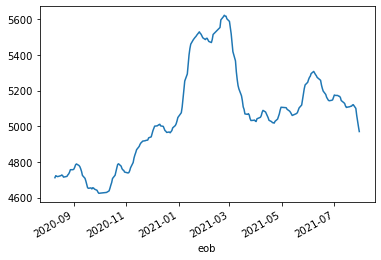

In [22]:
y_SMA.plot()

<AxesSubplot:xlabel='eob'>

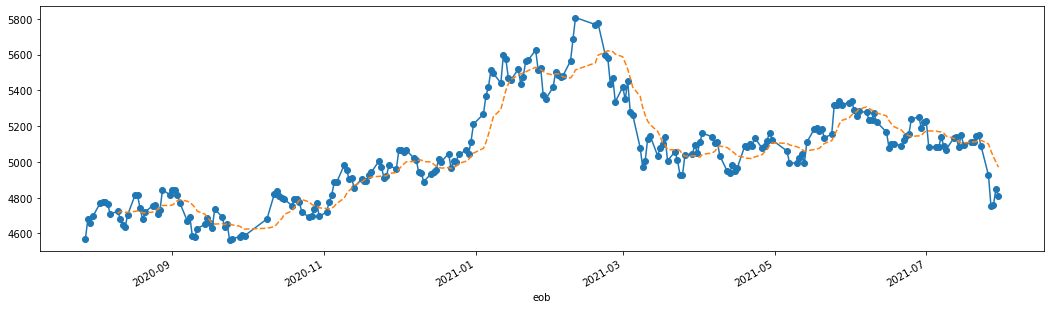

In [24]:
h1.close.plot(figsize=(18,5),style="-o")
y_SMA.plot(style="--")

* pyecharts可视化

In [25]:
from pyecharts.charts import Line

In [26]:
x

[Timestamp('2020-07-28 00:00:00+0800', tz='dateutil/PRC'),
 Timestamp('2020-07-29 00:00:00+0800', tz='dateutil/PRC'),
 Timestamp('2020-07-30 00:00:00+0800', tz='dateutil/PRC'),
 Timestamp('2020-07-31 00:00:00+0800', tz='dateutil/PRC'),
 Timestamp('2020-08-03 00:00:00+0800', tz='dateutil/PRC'),
 Timestamp('2020-08-04 00:00:00+0800', tz='dateutil/PRC'),
 Timestamp('2020-08-05 00:00:00+0800', tz='dateutil/PRC'),
 Timestamp('2020-08-06 00:00:00+0800', tz='dateutil/PRC'),
 Timestamp('2020-08-07 00:00:00+0800', tz='dateutil/PRC'),
 Timestamp('2020-08-10 00:00:00+0800', tz='dateutil/PRC'),
 Timestamp('2020-08-11 00:00:00+0800', tz='dateutil/PRC'),
 Timestamp('2020-08-12 00:00:00+0800', tz='dateutil/PRC'),
 Timestamp('2020-08-13 00:00:00+0800', tz='dateutil/PRC'),
 Timestamp('2020-08-14 00:00:00+0800', tz='dateutil/PRC'),
 Timestamp('2020-08-17 00:00:00+0800', tz='dateutil/PRC'),
 Timestamp('2020-08-18 00:00:00+0800', tz='dateutil/PRC'),
 Timestamp('2020-08-19 00:00:00+0800', tz='dateutil/PRC'

In [19]:
y_SMA.tolist()

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 4711.824462890625,
 4723.17705078125,
 4720.04072265625,
 4717.996923828125,
 4718.95517578125,
 4723.3466796875,
 4727.04208984375,
 4723.3990234375,
 4715.038037109375,
 4716.129736328125,
 4719.227685546875,
 4727.244384765625,
 4733.09296875,
 4742.65625,
 4756.619873046875,
 4756.718798828125,
 4759.65537109375,
 4769.97626953125,
 4783.770361328125,
 4788.907958984375,
 4780.259814453125,
 4773.503662109375,
 4761.34951171875,
 4746.412744140625,
 4724.714501953125,
 4708.198046875,
 4692.83408203125,
 4674.181201171875,
 4655.743115234375,
 4652.430078125,
 4654.6361328125,
 4648.773291015625,
 4655.547119140625,
 4653.65595703125,
 4647.929833984375,
 4641.015625,
 4631.347314453125,
 4624.351025390625,
 4629.193701171875,
 4637.8005859375,
 4652.577880859375,
 4669.71201171875,
 4684.3529296875,
 4707.213916015625,
 4725.760546875,
 4746.91640625,
 4767.0193359375,
 4786.07822265625,
 4789.812939453125,
 4776.620751953125,

In [27]:
c1=Line()
c1.add_xaxis(xaxis_data=x)
c1.add_yaxis(
        series_name="MA10",
        y_axis=y_SMA.tolist(),
        linestyle_opts=opts.LineStyleOpts(opacity=0.5),
        label_opts=opts.LabelOpts(is_show=False),
    )
c1.render_notebook()

In [28]:
c3=Line()
c3.add_xaxis(xaxis_data=x)
c3.add_yaxis(
        series_name="MA20",
        y_axis=talib.SMA(h1.close,20).tolist(),
        linestyle_opts=opts.LineStyleOpts(opacity=0.5),
        label_opts=opts.LabelOpts(is_show=False),
    )
c3.render_notebook()

In [31]:
c2=k1.overlap(c1)
c4=c2.overlap(c3)

In [33]:
c4.render_notebook()

## classwork 5.1

* 做出中国银行近两年的20日均线和10日均线图

* 在pyechart的图中把两个均线图叠加到之前的k线图中去

In [34]:
stocks_pa = history(symbol='SHSE.000001', frequency='1d', start_time='2020-03-20',  end_time='2022-03-20', fields='open, close, low, high, eob', adjust=ADJUST_PREV, df= True)

In [35]:
stocks_pa

,open,close,low,high,eob
0,2727.0186,2745.6182,2702.4934,2751.8965,2020-03-20 00:00:00+08:00
1,2677.5911,2660.1675,2656.5007,2703.3296,2020-03-23 00:00:00+08:00
2,2703.0193,2722.4380,2667.1333,2723.4065,2020-03-24 00:00:00+08:00
3,2775.3032,2781.5913,2757.8015,2788.6355,2020-03-25 00:00:00+08:00
4,2761.8960,2764.9109,2753.4282,2788.5039,2020-03-26 00:00:00+08:00
...,...,...,...,...,...
480,3271.8901,3223.5327,3223.5327,3297.7974,2022-03-14 00:00:00+08:00
481,3192.3638,3063.9651,3063.9651,3196.9160,2022-03-15 00:00:00+08:00
482,3107.6689,3170.7102,3023.3044,3177.7881,2022-03-16 00:00:00+08:00
483,3215.0105,3215.0444,3202.9336,3260.1672,2022-03-17 00:00:00+08:00


In [37]:
x=[]
y=[]
for i in stocks_pa.iterrows():
    y.append(i[1].tolist()[0:4])
    x.append(i[1].values[4])
    
k_pa=Kline()
k_pa.add_xaxis(x)
k_pa.add_yaxis("平安银行", y,itemstyle_opts=opts.ItemStyleOpts(color="pink", color0="black"),)
k_pa.set_global_opts(
        yaxis_opts=opts.AxisOpts(is_scale=True,splitarea_opts=opts.SplitAreaOpts(areastyle_opts=opts.AreaStyleOpts(opacity=1)
            )),
        xaxis_opts=opts.AxisOpts(is_scale=True),
        title_opts=opts.TitleOpts(title="Kline-平安银行"),datazoom_opts=[opts.DataZoomOpts(type_="inside"),opts.DataZoomOpts(type_="slider")]
    )
k_pa.render_notebook()

In [38]:
c_pa_10=Line()
c_pa_10.add_xaxis(xaxis_data=x)
c_pa_10.add_yaxis(
        series_name="MA10",
        y_axis=talib.SMA(stocks_pa.close,10).tolist(),
        linestyle_opts=opts.LineStyleOpts(opacity=0.5),
        label_opts=opts.LabelOpts(is_show=False),
    )
c_pa_10.render_notebook()

In [39]:
c_pa_20=Line()
c_pa_20.add_xaxis(xaxis_data=x)
c_pa_20.add_yaxis(
        series_name="MA20",
        y_axis=talib.SMA(stocks_pa.close,20).tolist(),
        linestyle_opts=opts.LineStyleOpts(opacity=0.5),
        label_opts=opts.LabelOpts(is_show=False),
    )
c_pa_20.render_notebook()

In [40]:
pa_10_20=k_pa.overlap(c_pa_10)
pa_10_20=pa_10_20.overlap(c_pa_20)

In [41]:
pa_10_20.render_notebook()

### 基于均线的策略

* 金叉与死叉

《量化投资以python为工具》

https://blog.csdn.net/troubleisafriend/article/details/48008263


## classwork 5.2

* 以5日均线为短线，30日为长线，金叉买入，死叉卖出来操作中国银行，看近两年的收益情况

### 指数加权移动平均

https://www.cnblogs.com/jiangxinyang/p/9705198.html



### MACD

http://www.voidcn.com/article/p-gcssjmdh-bqn.html


计算方法：

12日EMA的计算：EMA12 = 前一日EMA12 X 11/13 + 今日收盘 X 2/13

26日EMA的计算：EMA26 = 前一日EMA26 X 25/27 + 今日收盘 X 2/27

差离值（DIF）的计算： DIF = EMA12 - EMA26，即为talib-MACD返回值macd

根据差离值计算其9日的EMA，即离差平均值，是所求的DEA值。今日DEA = （前一日DEA X 8/10 + 今日DIF X 2/10），即为talib-MACD返回值signal

DIF与它自己的移动平均之间差距的大小一般BAR=（DIF-DEA)2，即为MACD柱状图。但是talib中MACD的计算是bar = (dif-dea)1

买卖原则为：

DIF-DEA均为正，买入信号参考。

DIF-DEA均为负，卖出信号参考。

视频讲解：

https://www.zhihu.com/zvideo/1316855559523069952

https://www.zhihu.com/people/jakefromchina/zvideos?page=9


### 预习问题

* DIF DEA MACD 都是什么，其计算方法与联系？背后的意义？


In [8]:
help(talib.MACD)

Help on function MACD in module talib._ta_lib:

MACD(...)
    MACD(real[, fastperiod=?, slowperiod=?, signalperiod=?])
    
    Moving Average Convergence/Divergence (Momentum Indicators)
    
    Inputs:
        real: (any ndarray)
    Parameters:
        fastperiod: 12
        slowperiod: 26
        signalperiod: 9
    Outputs:
        macd
        macdsignal
        macdhist



In [6]:
x,y,z=talib.MACD(history_data.close,fastperiod=6, slowperiod=12, signalperiod=9)

In [7]:
x

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
242   -28.4407
243   -65.2079
244   -83.3544
245   -78.8174
246   -77.7675
Length: 247, dtype: float64

### 参考例子完成以下作图

https://gallery.pyecharts.org/#/Candlestick/professional_kline_chart

* 做出 DIF 及其 9日 EMA 线

In [14]:
history_data.eob.astype(str).str.split(" ",expand=True)[0]

0      2020-07-28
1      2020-07-29
2      2020-07-30
3      2020-07-31
4      2020-08-03
          ...    
242    2021-07-26
243    2021-07-27
244    2021-07-28
245    2021-07-29
246    2021-07-30
Name: 0, Length: 247, dtype: object

In [17]:
date1=history_data.eob.astype(str).str.split(" ",expand=True)[0]
date1

0      2020-07-28
1      2020-07-29
2      2020-07-30
3      2020-07-31
4      2020-08-03
          ...    
242    2021-07-26
243    2021-07-27
244    2021-07-28
245    2021-07-29
246    2021-07-30
Name: 0, Length: 247, dtype: object

In [18]:
x.name="macd"
y.name="macdsignal"
z.name="macdhist"
date1.name="date"
pd.concat([x,y,z,date1],axis=1)

,macd,macdsignal,macdhist,date
0,NaN,NaN,NaN,2020-07-28
1,NaN,NaN,NaN,2020-07-29
2,NaN,NaN,NaN,2020-07-30
3,NaN,NaN,NaN,2020-07-31
4,NaN,NaN,NaN,2020-08-03
...,...,...,...,...
242,-28.4407,-10.4467,-17.9941,2021-07-26
243,-65.2079,-21.3989,-43.8090,2021-07-27
244,-83.3544,-33.7900,-49.5644,2021-07-28
245,-78.8174,-42.7955,-36.0219,2021-07-29


In [21]:
L_DIF=Line()
L_DIF.add_xaxis(date1.tolist())
L_DIF.add_yaxis("macd",x.tolist(),label_opts=opts.LabelOpts(is_show=False))
L_DIF.render_notebook()

In [22]:
L_EMA=Line()
L_EMA.add_xaxis(date1.tolist())
L_EMA.add_yaxis("macdsignal",y.tolist(),label_opts=opts.LabelOpts(is_show=False))
L_EMA.render_notebook()

* 画出macd三个量的叠加图： 两条线，一个柱图

In [23]:
B_BAR=Bar()
B_BAR.add_xaxis(date1.tolist())
B_BAR.add_yaxis("macdhist",z.tolist(),label_opts=opts.LabelOpts(is_show=False),
               itemstyle_opts=opts.ItemStyleOpts(
                color=JsCode(
                    """
                        function(params) {
                            var colorList;
                            if (params.data >= 0) {
                              colorList = '#ef232a';
                            } else {
                              colorList = '#14b143';
                            }
                            return colorList;
                        }
                        """
                )
            ))
B_BAR.render_notebook()

In [24]:
B_L_L = B_BAR.overlap(L_EMA)
B_L_L = B_L_L.overlap(L_DIF)
B_L_L.set_global_opts(xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(is_show=False)))
B_L_L.render_notebook()

* 做出对应的股价的K线图 并把K线图与macd图叠加起来

In [27]:
# pyecharts的数据只接受列表，数据类型需要简单
y1=[]
for i,j in history_data.iterrows():
    y1.append(j.tolist()[0:4])
    
c=Kline()
c.add_xaxis(date1.tolist())
c.add_yaxis("kline", y1,itemstyle_opts=opts.ItemStyleOpts(color="pink", color0="black"))
c.set_global_opts(datazoom_opts=opts.DataZoomOpts(is_show=True,xaxis_index=[0,1]))
#c.render_notebook()

In [28]:
grid_chart = Grid(init_opts=opts.InitOpts(width="700px", height="400px"))
grid_chart.add(
        c,
        grid_opts=opts.GridOpts(pos_left="3%", pos_right="1%", height="50%"),
    )

grid_chart.add(
        B_L_L,
        grid_opts=opts.GridOpts(
            pos_left="3%", pos_right="1%", pos_top="70%", height="20%"
        ),
    )

In [29]:
grid_chart.render_notebook()

## classwork 5.3

* 通过pyecharts做出中国银行近两年MACD线

In [30]:
zg = history(symbol='SHSE.601988', frequency='1d', start_time='2020-03-30',  end_time='2022-03-30', fields='open, close, low, high, eob', adjust=ADJUST_PREV, df= True)

In [33]:
date_zg=zg.eob.astype(str).str.split(" ",expand=True)[0]
date_zg

0      2020-03-30
1      2020-03-31
2      2020-04-01
3      2020-04-02
4      2020-04-03
          ...    
482    2022-03-24
483    2022-03-25
484    2022-03-28
485    2022-03-29
486    2022-03-30
Name: 0, Length: 487, dtype: object

In [35]:
y1=[]
for i,j in zg.iterrows():
    y1.append(j.tolist()[0:4])
    
c=Kline()
c.add_xaxis(date_zg.tolist())
c.add_yaxis("kline", y1,itemstyle_opts=opts.ItemStyleOpts(color="pink", color0="black"))
c.set_global_opts(datazoom_opts=opts.DataZoomOpts(is_show=True,xaxis_index=[0,1]))

In [37]:
x,y,z=talib.MACD(zg.close,fastperiod=6, slowperiod=12, signalperiod=9)

In [39]:
L_DIF=Line()
L_DIF.add_xaxis(date_zg.tolist())
L_DIF.add_yaxis("macd",x.tolist(),label_opts=opts.LabelOpts(is_show=False))


L_EMA=Line()
L_EMA.add_xaxis(date_zg.tolist())
L_EMA.add_yaxis("macdsignal",y.tolist(),label_opts=opts.LabelOpts(is_show=False))

B_BAR=Bar()
B_BAR.add_xaxis(date_zg.tolist())
B_BAR.add_yaxis("macdhist",z.tolist(),label_opts=opts.LabelOpts(is_show=False),
               itemstyle_opts=opts.ItemStyleOpts(
                color=JsCode(
                    """
                        function(params) {
                            var colorList;
                            if (params.data >= 0) {
                              colorList = '#ef232a';
                            } else {
                              colorList = '#14b143';
                            }
                            return colorList;
                        }
                        """
                )
            ))


In [40]:
B_L_L = B_BAR.overlap(L_EMA)
B_L_L = B_L_L.overlap(L_DIF)
B_L_L.set_global_opts(xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(is_show=False)))
B_L_L.render_notebook()

In [41]:
grid_chart = Grid(init_opts=opts.InitOpts(width="700px", height="400px"))
grid_chart.add(
        c,
        grid_opts=opts.GridOpts(pos_left="3%", pos_right="1%", height="50%"),
    )

grid_chart.add(
        B_L_L,
        grid_opts=opts.GridOpts(
            pos_left="3%", pos_right="1%", pos_top="70%", height="20%"
        ),
    )

In [42]:
grid_chart.render_notebook()

## classwork 5.4

* 基于书本的策略思路（467页），看DIF与DEA的金叉与死叉，来操作中国银行，看近两年的收益情况